In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,  recall_score, precision_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('data/whole_data_practice3.csv')
df.info()
df.present.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64988 entries, 0 to 64987
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RAJ2000  64988 non-null  float64
 1   DEJ2000  64988 non-null  float64
 2   nobs     64988 non-null  int64  
 3   Vmag     64988 non-null  float64
 4   e_Vmag   64988 non-null  float64
 5   Bmag     64988 non-null  float64
 6   e_Bmag   64988 non-null  float64
 7   gpmag    64988 non-null  float64
 8   e_gpmag  64988 non-null  float64
 9   rpmag    64988 non-null  float64
 10  e_rpmag  64988 non-null  float64
 11  ipmag    64988 non-null  float64
 12  e_ipmag  64988 non-null  float64
 13  fuv_mag  64988 non-null  float64
 14  nuv_mag  64988 non-null  float64
 15  err      64988 non-null  float64
 16  present  64988 non-null  int64  
 17  type     6517 non-null   object 
 18  min_mag  64984 non-null  float64
 19  max_mag  64984 non-null  float64
dtypes: float64(17), int64(2), object(1)
memory usage: 

present
0    58404
1     6584
Name: count, dtype: int64

In [3]:
df = df.dropna(subset=['min_mag', 'max_mag'])

Stype = df.present

df['B-V'] = df.Bmag - df.Vmag
df['B-gp'] = df.Bmag - df.gpmag
df['B-rp'] = df.Bmag - df.rpmag

df = df.drop(columns=['type', 'present', 'nobs'])



df.info()

X_train, X_test, y_train, y_test = train_test_split(df, Stype, stratify=Stype, random_state=100)
y_train.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 64984 entries, 4 to 64987
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RAJ2000  64984 non-null  float64
 1   DEJ2000  64984 non-null  float64
 2   Vmag     64984 non-null  float64
 3   e_Vmag   64984 non-null  float64
 4   Bmag     64984 non-null  float64
 5   e_Bmag   64984 non-null  float64
 6   gpmag    64984 non-null  float64
 7   e_gpmag  64984 non-null  float64
 8   rpmag    64984 non-null  float64
 9   e_rpmag  64984 non-null  float64
 10  ipmag    64984 non-null  float64
 11  e_ipmag  64984 non-null  float64
 12  fuv_mag  64984 non-null  float64
 13  nuv_mag  64984 non-null  float64
 14  err      64984 non-null  float64
 15  min_mag  64984 non-null  float64
 16  max_mag  64984 non-null  float64
 17  B-V      64984 non-null  float64
 18  B-gp     64984 non-null  float64
 19  B-rp     64984 non-null  float64
dtypes: float64(20)
memory usage: 10.4 MB


present
0    43800
1     4938
Name: count, dtype: int64

In [4]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [5]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule



sm = NeighbourhoodCleaningRule(n_neighbors=13)
X_train, y_train = sm.fit_resample(X_train, y_train)

y_train.value_counts()

present
0    21984
1     4938
Name: count, dtype: int64

In [6]:
pol = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False).fit(X_train)

X_train = pd.DataFrame(pol.transform(X_train), columns=pol.get_feature_names_out())#pd.concat((X_train, pd.DataFrame(pol.transform(X_train), columns=pol.get_feature_names_out())), axis= 1)
X_test = pd.DataFrame(pol.transform(X_test), columns=pol.get_feature_names_out())#pd.concat((X_test, pd.DataFrame(pol.transform(X_test), columns=pol.get_feature_names_out())), axis= 1)
X_train

,RAJ2000,DEJ2000,Vmag,e_Vmag,Bmag,e_Bmag,gpmag,e_gpmag,rpmag,e_rpmag,...,min_mag max_mag,min_mag B-V,min_mag B-gp,min_mag B-rp,max_mag B-V,max_mag B-gp,max_mag B-rp,B-V B-gp,B-V B-rp,B-gp B-rp
0,135.648402,4.950220,11.580,0.058,12.016,0.053,11.720,0.021,11.459,0.065,...,174.370000,5.737760,3.895360,7.330120,5.777000,3.92200,7.380250,0.129056,0.242852,0.164872
1,124.660788,49.121696,12.677,0.047,13.229,0.055,13.013,0.233,12.563,0.049,...,214.475800,8.075760,3.160080,9.743580,8.092320,3.16656,9.763560,0.119232,0.367632,0.143856
2,163.543822,-0.319003,12.972,0.022,13.335,0.028,13.102,0.030,12.912,0.020,...,166.409100,4.671810,2.998710,5.444010,4.693590,3.01269,5.469390,0.084579,0.153549,0.098559
3,17.058233,-0.678810,11.962,0.026,12.458,0.034,12.204,0.057,11.851,0.034,...,195.859800,6.934080,3.550920,8.485860,6.948960,3.55854,8.504070,0.125984,0.301072,0.154178
4,329.870880,3.157674,11.877,0.065,12.385,0.050,12.086,0.029,11.752,0.062,...,235.469000,7.792720,4.586660,9.710220,7.797800,4.58965,9.716550,0.151892,0.321564,0.189267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26917,19.594852,5.494816,13.489,0.016,14.731,0.021,14.154,0.024,13.018,0.103,...,184.007200,16.791840,7.801040,23.159760,16.903620,7.85297,23.313930,0.716634,2.127546,0.988401
26918,324.724983,2.078649,12.020,0.113,13.467,0.012,12.814,0.023,11.443,0.108,...,3.744000,20.836800,9.403200,29.145600,0.376220,0.16978,0.526240,0.944891,2.928728,1.321672
26919,349.506567,12.929279,12.405,0.408,12.707,0.021,12.383,0.009,12.038,0.033,...,211.266000,4.385040,4.704480,9.713880,4.394100,4.71420,9.733950,0.097848,0.202038,0.216756
26920,328.817529,-26.184710,11.474,0.011,12.136,0.009,11.781,0.000,11.319,0.021,...,135.140400,7.685820,4.121550,9.485370,7.705680,4.13220,9.509880,0.235010,0.540854,0.290035


```python
from sklearn.feature_selection import RFECV

kf = StratifiedKFold(shuffle=True, random_state=0, n_splits=10)

select = RFECV(RandomForestClassifier(n_estimators=20, max_depth=15, max_leaf_nodes=1800, min_samples_split=25),
               verbose=2, scoring='roc_auc', n_jobs=-1, cv = kf).fit(X_train, y_train)
select.support_
```

print(select.support_.sum(), X_train.columns[select.support_])
pd.DataFrame(select.cv_results_)

In [7]:
X_train = X_train[['Vmag', 'Bmag', 'gpmag', 'min_mag', 'max_mag', 'B-rp',
       'rpmag', 'ipmag', 'Vmag gpmag',
        'Bmag ipmag', 'gpmag rpmag', 'gpmag min_mag',
       'rpmag min_mag', 'rpmag B-rp', 'ipmag min_mag', 'fuv_mag min_mag',
       'fuv_mag B-rp', 'nuv_mag min_mag',  'min_mag max_mag',
       'min_mag B-rp']]
X_test = X_test[['Vmag', 'Bmag', 'gpmag', 'min_mag', 'max_mag', 'B-rp',
       'rpmag', 'ipmag', 'Vmag gpmag',
        'Bmag ipmag', 'gpmag rpmag', 'gpmag min_mag',
       'rpmag min_mag', 'rpmag B-rp', 'ipmag min_mag', 'fuv_mag min_mag',
       'fuv_mag B-rp', 'nuv_mag min_mag', 'min_mag max_mag',
       'min_mag B-rp']]
X_test

,Vmag,Bmag,gpmag,min_mag,max_mag,B-rp,rpmag,ipmag,Vmag gpmag,Bmag ipmag,gpmag rpmag,gpmag min_mag,rpmag min_mag,rpmag B-rp,ipmag min_mag,fuv_mag min_mag,fuv_mag B-rp,nuv_mag min_mag,min_mag max_mag,min_mag B-rp
0,11.805,12.360,12.026,13.53,13.56,0.720,11.640,11.507,141.966930,142.226520,139.982640,162.71178,157.48920,8.380800,155.68971,312.42123,16.625520,223.90797,183.4668,9.74160
1,15.600,16.281,15.872,10.81,0.41,0.816,15.465,15.532,247.603200,252.876492,245.460480,171.57632,167.17665,12.619440,167.90092,252.95400,19.094400,220.09160,4.4321,8.82096
2,14.199,14.803,14.438,12.76,12.79,0.739,14.064,13.903,205.005162,205.806109,203.056032,184.22888,179.45664,10.393296,177.40228,307.01836,17.781079,220.79904,163.2004,9.42964
3,15.855,16.272,16.020,15.74,15.77,0.452,15.820,15.633,253.997100,254.380176,253.436400,252.15480,249.00680,7.150640,246.06342,366.56886,10.526628,304.74214,248.2198,7.11448
4,10.773,11.347,10.978,13.26,13.47,0.710,10.637,10.550,118.265994,119.710850,116.772986,145.56828,141.04662,7.552270,139.89300,297.22290,15.914650,203.66034,178.6122,9.41460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16241,12.548,13.119,12.778,13.20,13.22,0.731,12.388,12.256,160.338344,160.786464,158.293864,168.66960,163.52160,9.055628,161.77920,308.08800,17.061540,219.97800,174.5040,9.64920
16242,12.510,13.139,12.801,12.91,12.93,0.778,12.361,12.220,160.140510,160.558580,158.233161,165.26091,159.58051,9.616858,157.76020,301.60342,18.175636,218.37265,166.9263,10.04398
16243,12.966,13.466,13.149,14.47,0.18,0.650,12.816,12.730,170.489934,171.422180,168.517584,190.26603,185.44752,8.330400,184.20310,321.63916,14.448200,244.91922,2.6046,9.40550
16244,12.730,13.298,12.986,13.83,13.86,0.683,12.615,12.534,165.311780,166.677132,163.818390,179.59638,174.46545,8.616045,173.34522,324.71457,16.036157,231.40356,191.6838,9.44589


In [8]:
from skopt import BayesSearchCV

param_space = {
    'min_samples_leaf': (5, 100, 'uniform'),
    'max_features':  (4, 20, 'uniform'),
    'max_depth': (2, 50, 'uniform'),
    #'max_leaf_nodes': (5, 70000, 'uniform'),
    'criterion': ('gini', 'log_loss', 'entropy')
}

opt = BayesSearchCV(
    RandomForestClassifier(n_estimators=20,  random_state=0, class_weight='balanced', n_jobs=-1),
    param_space,
    n_iter=30,
    cv=5,
    scoring='roc_auc',
    random_state=0
).fit(X_train, y_train)
print(opt.best_score_, opt.best_params_)

0.9878253235587673 OrderedDict({'criterion': 'entropy', 'max_depth': 45, 'max_features': 17, 'min_samples_leaf': 5})


In [9]:
param = opt.best_params_
forest =  RandomForestClassifier(class_weight={1:30, 0:1}, n_jobs=-1,  random_state=0, n_estimators=666,
                                 **param).fit(X_train, y_train)
print(roc_auc_score(y_test, forest.predict(X_test)), roc_auc_score(y_train, forest.predict(X_train)))
print(precision_score(y_test, forest.predict(X_test)), recall_score(y_test, forest.predict(X_test)))
confusion_matrix(y_test, forest.predict(X_test))

0.9043472760864861 0.980986171761281
0.3956692913385827 0.976913730255164


array([[12144,  2456],
       [   38,  1608]])

Text(70.72222222222221, 0.5, 'Actual')

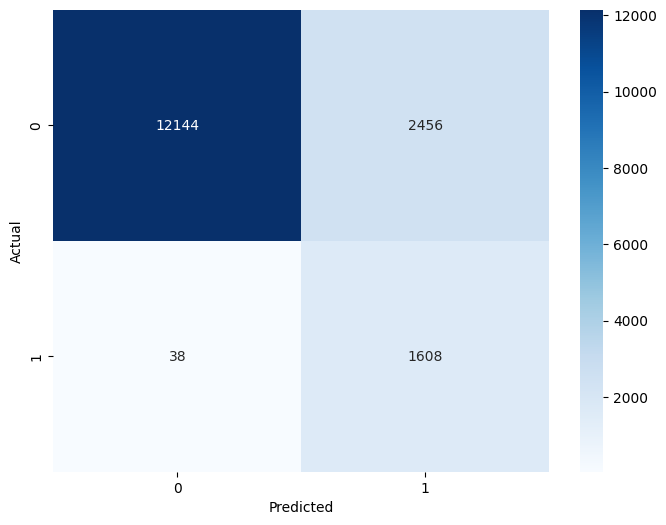

In [10]:
conf = confusion_matrix(y_test, forest.predict(X_test))
plt.figure(figsize=(8,6))
ax = plt.axes()
sns.heatmap(conf, annot = conf, fmt='.5g', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [11]:
imp = list(zip(list(forest.feature_importances_), forest.feature_names_in_))
for v in sorted(imp):
    print(v)

(np.float64(0.01692971099372527), 'rpmag min_mag')
(np.float64(0.017693312607304293), 'max_mag')
(np.float64(0.018209609017961325), 'nuv_mag min_mag')
(np.float64(0.020882083710840892), 'ipmag min_mag')
(np.float64(0.02243948095868943), 'Vmag gpmag')
(np.float64(0.022504299983997746), 'fuv_mag B-rp')
(np.float64(0.026544910550652764), 'gpmag min_mag')
(np.float64(0.02711592880586216), 'gpmag rpmag')
(np.float64(0.027721920427583535), 'gpmag')
(np.float64(0.02940355256320838), 'rpmag B-rp')
(np.float64(0.029490712749339135), 'Vmag')
(np.float64(0.034035721536998825), 'fuv_mag min_mag')
(np.float64(0.03530372413343787), 'rpmag')
(np.float64(0.03854577001966936), 'min_mag max_mag')
(np.float64(0.03952392744651142), 'ipmag')
(np.float64(0.042895817265464736), 'min_mag B-rp')
(np.float64(0.04345742578884128), 'Bmag ipmag')
(np.float64(0.04647553232684982), 'Bmag')
(np.float64(0.058081715997996664), 'B-rp')
(np.float64(0.40274484311506525), 'min_mag')


In [12]:
from sklearn.inspection import permutation_importance
tea = permutation_importance(forest, X_test, y_test, scoring = 'average_precision', n_jobs=-1, random_state=32)

In [13]:
imp = list(zip(list(tea.importances_mean),X_test.columns))
sorted(imp)

[(np.float64(0.04523617884528412), 'max_mag'),
 (np.float64(0.07872233496959458), 'nuv_mag min_mag'),
 (np.float64(0.08223347516589326), 'ipmag min_mag'),
 (np.float64(0.08416556754223536), 'Vmag gpmag'),
 (np.float64(0.0897681848892949), 'Vmag'),
 (np.float64(0.09467802542339018), 'rpmag min_mag'),
 (np.float64(0.09962100138854471), 'gpmag'),
 (np.float64(0.10281751578234999), 'min_mag max_mag'),
 (np.float64(0.10334872917597904), 'fuv_mag min_mag'),
 (np.float64(0.1043384004205149), 'B-rp'),
 (np.float64(0.10989838000269743), 'fuv_mag B-rp'),
 (np.float64(0.11843461363265698), 'gpmag rpmag'),
 (np.float64(0.13107965245114828), 'rpmag'),
 (np.float64(0.13666485620587915), 'Bmag'),
 (np.float64(0.14356639945063893), 'Bmag ipmag'),
 (np.float64(0.15301069607812473), 'rpmag B-rp'),
 (np.float64(0.15735867082040564), 'ipmag'),
 (np.float64(0.17338663810733862), 'gpmag min_mag'),
 (np.float64(0.17453573669362712), 'min_mag B-rp'),
 (np.float64(0.4205345233537544), 'min_mag')]